In [9]:
# Gerekli Kütüphanelerin import edilmesi
import math
import matplotlib.pyplot as plt
import numpy as np

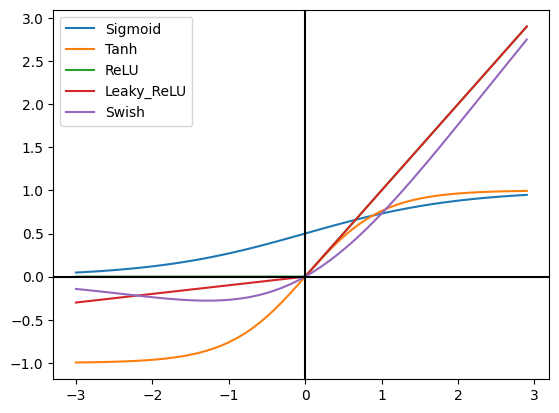

In [10]:
# Aktivasyon fonksiyonlarını tanımlamak

# Sigmoid fonksiyonu

def sigmoid(x):
    a=[]
    for i in x:
        a.append(1/(1+math.exp(-i)))
    return a

#Hiperbolik Tanjant
def tanh(x, derivate=False):
    if (derivate==True):
        return (1-(x**2))
    return np.tanh(x)

# ReLU fonksiyonu
def re(x):
    b=[]
    for i in x:
        if i<0:
            b.append(0)
        else:
            b.append(i)
    return b

# Leaky RelU Fonksiyonu

def lr(x):
    b=[]
    for i in x:
        if i<0:
            b.append(i/10)
        else:
            b.append(i)
    return b

# Grafiklerin oluşturulması için aralıkların tanımlanması

x = np.arange(-3., 3., 0.1)

sig = sigmoid(x)
tanh = tanh(x)
relu = re(x)
leaky_relu = lr(x)
swish = sig*x

#Fonksiyonların Ekrana çizdirilmesi

line_1, = plt.plot(x,sig, label="Sigmoid")
line_2, = plt.plot(x,tanh, label="Tanh")
line_3, = plt.plot(x,relu, label="ReLU")
line_4, = plt.plot(x,leaky_relu, label="Leaky_ReLU")
line_5, = plt.plot(x,swish, label="Swish")

plt.legend(handles=[line_1,line_2,line_3,line_4,line_5])
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.show()

## AKTİVASYON FONKSİYONLARININ PERFORMANSLARININ DEĞERLENDİRİLMESİ

Bunun için **mnist** veri setini kullanacağız ve aktivasyon fonksiyonlarını değiştirerek performanslarını değerlendireceğiz.

### Kullanılan donanım bilgilerini görmek için bu kısmı çalıştırabiliriz.
Biz bu çalışmayı GPU üzerinden yapmayı istiyoruz.

In [11]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

I0000 00:00:1738313066.318285    3425 gpu_device.cc:2022] Created device /device:GPU:0 with 6428 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1
I0000 00:00:1738313066.318839    3425 gpu_device.cc:2022] Created device /device:GPU:1 with 6634 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:02:00.0, compute capability: 6.1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12116343052670150997
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6741286912
 locality {
   bus_id: 1
   links {
     link {
       device_id: 1
       type: "StreamExecutor"
       strength: 1
     }
   }
 }
 incarnation: 5415064524370966291
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419,
 name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 6956253184
 locality {
   bus_id: 1
   links {
     link {
       type: "StreamExecutor"
       strength: 1
     }
   }
 }
 incarnation: 244876898496267263
 physical_device_desc: "device: 1, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:02:00.0, compute capability: 6.1"
 xla_global_id: 2144165316]

## Kütüphanelerin Kurulması ve gerekli importların yapılması

In [12]:
from __future__ import print_function
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

# Veri Setinin indirilmesi

In [13]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

# Verilerden bir kısmının görselleştirilmesi

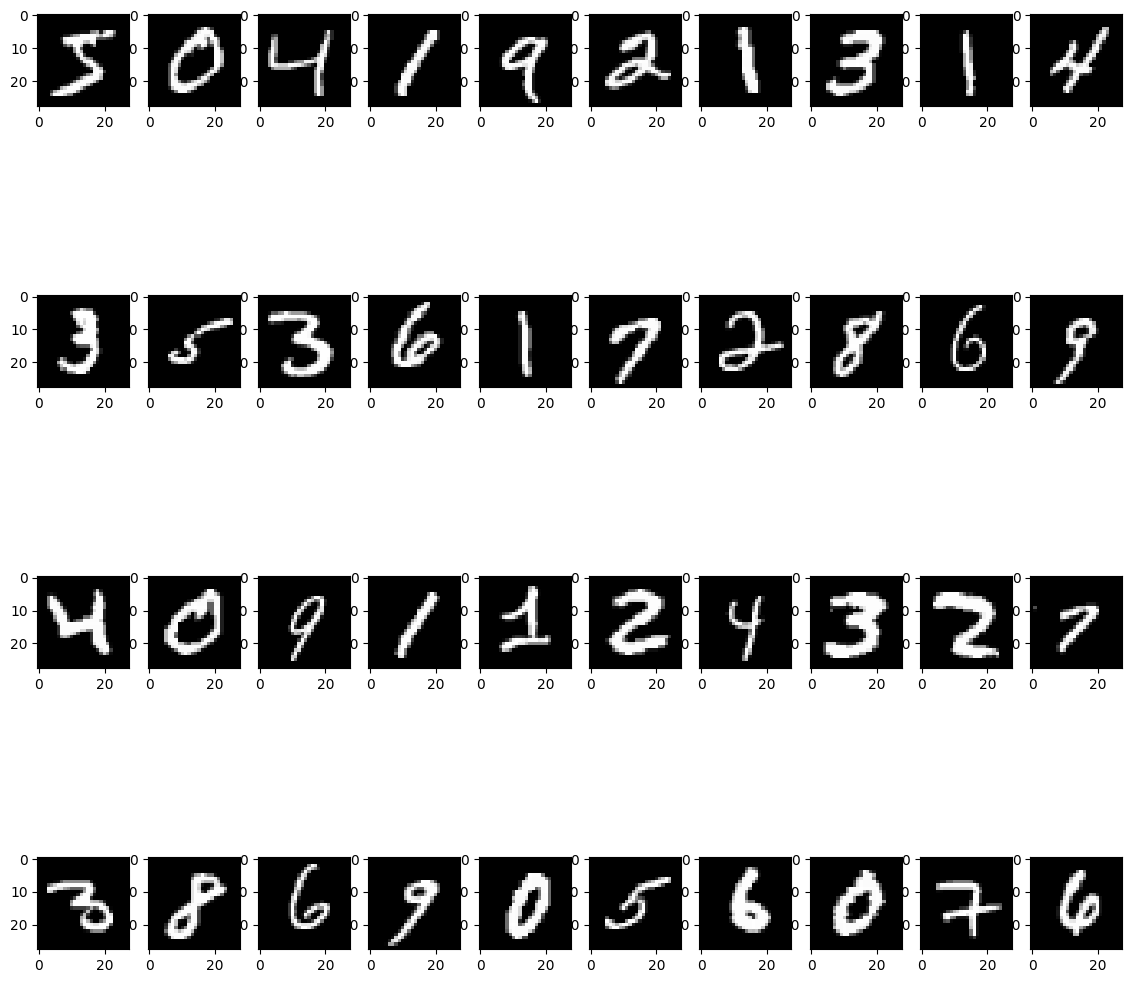

In [14]:
plt.figure(figsize=(14,14))
x,y=10,4
for i in range(40):
    plt.subplot(y,x, i+1)
    plt.imshow(x_train[i], cmap="gray")
plt.show()

# Yapılandırma Ayarları

In [15]:
batch_size = 128 #Küme boyutu
num_classes = 10 # Sınıf Sayısı
epochs = 20 # Eğitimin epoch sayısı
w_l2 = 1e-5 #Başlangıç

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5,min_lr=1e-5)

In [17]:
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows,img_cols,1 )
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols, 1)
    input_shape = (img_rows,img_cols, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

print("input shape :", input_shape)
print("x_train shape :", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

#sınıf vektörlerini ikili sınıf matrisine dönüştürmek

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

input shape : (28, 28, 1)
x_train shape : (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Sigmoid Fonksiyonu

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),  kernel_regularizer=tf.keras.regularizers.L2(w_l2), 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Conv2D(64,(3,3),kernel_regularizer=keras.regularizers.L2(w_l2)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128,kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,778 (4.58 MB)

 Trainable params: 1,200,330 (4.58 MB)

 Non-trainable params: 448 (1.75 KB)

# Modelin Eğitilmesi ve Test

In [19]:
hist_sigmoid=model.fit(x_train,y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test,y_test),
                      callbacks=[reduce_lr])
sigmoid_score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss :", sigmoid_score[0])
print("Test accuracy :", sigmoid_score[1])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7676 - loss: 0.8485 - val_accuracy: 0.8937 - val_loss: 0.3775 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9452 - loss: 0.2280 - val_accuracy: 0.9810 - val_loss: 0.0821 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9627 - loss: 0.1480 - val_accuracy: 0.9681 - val_loss: 0.1165 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9688 - loss: 0.1213 - val_accuracy: 0.9827 - val_loss: 0.0688 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9730 - loss: 0.1069 - val_accuracy: 0.9827 - val_loss: 0.0687 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9749 - loss: 0.0991 - val_accuracy: 0.9870 - val_loss: 0.0577 - learning_rate: 0.0010
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9804 - loss: 0.

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),  kernel_regularizer=tf.keras.regularizers.L2(w_l2), 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation("tanh"))
model.add(Conv2D(64,(3,3),kernel_regularizer=keras.regularizers.L2(w_l2)))
model.add(BatchNormalization())
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128,kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation("tanh"))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,778 (4.58 MB)

 Trainable params: 1,200,330 (4.58 MB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
hist_tanh=model.fit(x_train,y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test,y_test),
                      callbacks=[reduce_lr])
tanh_score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss :", tanh_score[0])
print("Test accuracy :", tanh_score[1])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9004 - loss: 0.3339 - val_accuracy: 0.9633 - val_loss: 0.1216 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9765 - loss: 0.0834 - val_accuracy: 0.9843 - val_loss: 0.0566 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9813 - loss: 0.0675 - val_accuracy: 0.9832 - val_loss: 0.0560 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9835 - loss: 0.0625 - val_accuracy: 0.9865 - val_loss: 0.0504 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9869 - loss: 0.0516 - val_accuracy: 0.9758 - val_loss: 0.0814 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9881 - loss: 0.0514 - val_accuracy: 0.9871 - val_loss: 0.0507 - learning_rate: 0.0010
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9880 - loss: 0.

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),  kernel_regularizer=tf.keras.regularizers.L2(w_l2), 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3),kernel_regularizer=keras.regularizers.L2(w_l2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128,kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,778 (4.58 MB)

 Trainable params: 1,200,330 (4.58 MB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
hist_relu=model.fit(x_train,y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test,y_test),
                      callbacks=[reduce_lr])
relu_score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss :", relu_score[0])
print("Test accuracy :", relu_score[1])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9074 - loss: 0.3244 - val_accuracy: 0.8481 - val_loss: 0.4508 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9780 - loss: 0.0808 - val_accuracy: 0.9892 - val_loss: 0.0409 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9835 - loss: 0.0607 - val_accuracy: 0.9824 - val_loss: 0.0598 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9861 - loss: 0.0538 - val_accuracy: 0.9911 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9876 - loss: 0.0511 - val_accuracy: 0.9902 - val_loss: 0.0421 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9898 - loss: 0.0448 - val_accuracy: 0.9888 - val_loss: 0.0476 - learning_rate: 0.0010
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9913 - loss: 0.

In [24]:
from tensorflow.keras.activations import leaky_relu

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),  kernel_regularizer=tf.keras.regularizers.L2(w_l2), 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation(lambda x: leaky_relu(x, negative_slope=0.2)))
model.add(Conv2D(64,(3,3),kernel_regularizer=keras.regularizers.L2(w_l2)))
model.add(BatchNormalization())
model.add(Activation(lambda x: leaky_relu(x, negative_slope=0.2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128,kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation(lambda x: leaky_relu(x, negative_slope=0.2)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,778 (4.58 MB)

 Trainable params: 1,200,330 (4.58 MB)

 Non-trainable params: 448 (1.75 KB)

In [26]:
hist_Leakyrelu=model.fit(x_train,y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test,y_test),
                      callbacks=[reduce_lr])
LeakyRelu_score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss :", LeakyRelu_score[0])
print("Test accuracy :", LeakyRelu_score[1])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9100 - loss: 0.3163 - val_accuracy: 0.9250 - val_loss: 0.2565 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9785 - loss: 0.0813 - val_accuracy: 0.9826 - val_loss: 0.0572 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9817 - loss: 0.0667 - val_accuracy: 0.9878 - val_loss: 0.0462 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9853 - loss: 0.0576 - val_accuracy: 0.9863 - val_loss: 0.0509 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9869 - loss: 0.0532 - val_accuracy: 0.9859 - val_loss: 0.0571 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9876 - loss: 0.0502 - val_accuracy: 0.9890 - val_loss: 0.0449 - learning_rate: 0.0010
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9900 - loss: 0.

In [27]:
from tensorflow.keras.activations import swish

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),  kernel_regularizer=tf.keras.regularizers.L2(w_l2), 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation(lambda x: swish(x)))
model.add(Conv2D(64,(3,3),kernel_regularizer=keras.regularizers.L2(w_l2)))
model.add(BatchNormalization())
model.add(Activation(lambda x: swish(x)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128,kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation(lambda x: swish(x)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,778 (4.58 MB)

 Trainable params: 1,200,330 (4.58 MB)

 Non-trainable params: 448 (1.75 KB)

In [29]:
hist_swish=model.fit(x_train,y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test,y_test),
                      callbacks=[reduce_lr])
swish_score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss :", swish_score[0])
print("Test accuracy :", swish_score[1])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9166 - loss: 0.2954

2025-01-31 11:52:03.004273: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_transpose_fusion', 16 bytes spill stores, 12 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9167 - loss: 0.2951 - val_accuracy: 0.9599 - val_loss: 0.1806 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9804 - loss: 0.0731 - val_accuracy: 0.9877 - val_loss: 0.0439 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9865 - loss: 0.0528 - val_accuracy: 0.9845 - val_loss: 0.0557 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9895 - loss: 0.0460 - val_accuracy: 0.9891 - val_loss: 0.0440 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9902 - loss: 0.0417 - val_accuracy: 0.9890 - val_loss: 0.0478 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9907 - loss: 0.0426 - val_accuracy: 0.9916 - val_loss: 0.0420 - learning_rate: 0.0010
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9923 - loss: 0.0382 - val_

2025-01-31 11:53:28.918020: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_transpose_fusion', 16 bytes spill stores, 12 bytes spill loads



Test Loss : 0.04120264947414398
Test accuracy : 0.9927999973297119


In [30]:
def plot_history(hists, attribute="val_loss", axis=(-1,21,0.85,0.94), loc="lower right"):
    
    attributes = {"acc":"accuracy","lr":"learning_rate",
                  "loss":"loss","val_acc":"val_accuracy",
                  "val_loss":"val_loss"}
    _attribute = attributes[attribute]
    ylabel = {"loss":"loss","val_acc":"val_accuracy","acc":"accuracy"}
    title = {"val_loss":"valid.loss", "loss":"trn. loss", "val_acc":"val_accuracy", "acc":"accuracy"}
    num_hists = len(hists)

    plt.figure(figsize=(12,8))
    #plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[_attribute])
    plt.title(title[attribute])
    plt.ylabel(ylabel[attribute[:]])
    plt.xlabel("epochs")
    plt.legend(["Sigmoid","tanh","ReLU","Leaky_ReLU","Swish"],loc=loc)

    plt.show()
    

In [31]:
hists = [hist_sigmoid,hist_tanh,hist_relu,hist_Leakyrelu,hist_swish]

In [32]:
#plt.plot(hist_Leakyrelu.history["val_accuracy"])
#plt.axis=(1,21,0.95,0,96)
#plt.title("accuracy")
#plt.xlabel("epochs")
#plt.legend("Sigmoid")

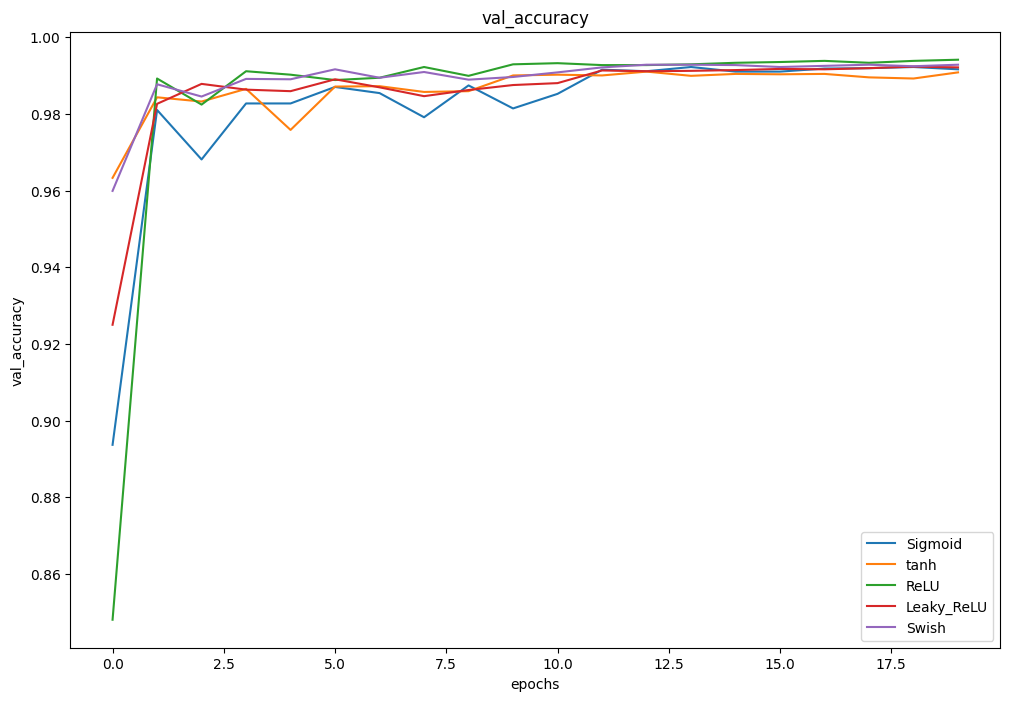

In [33]:
plot_history(hists, attribute="val_acc",axis=(-1,21,0.95,0.9960), loc="lower right")

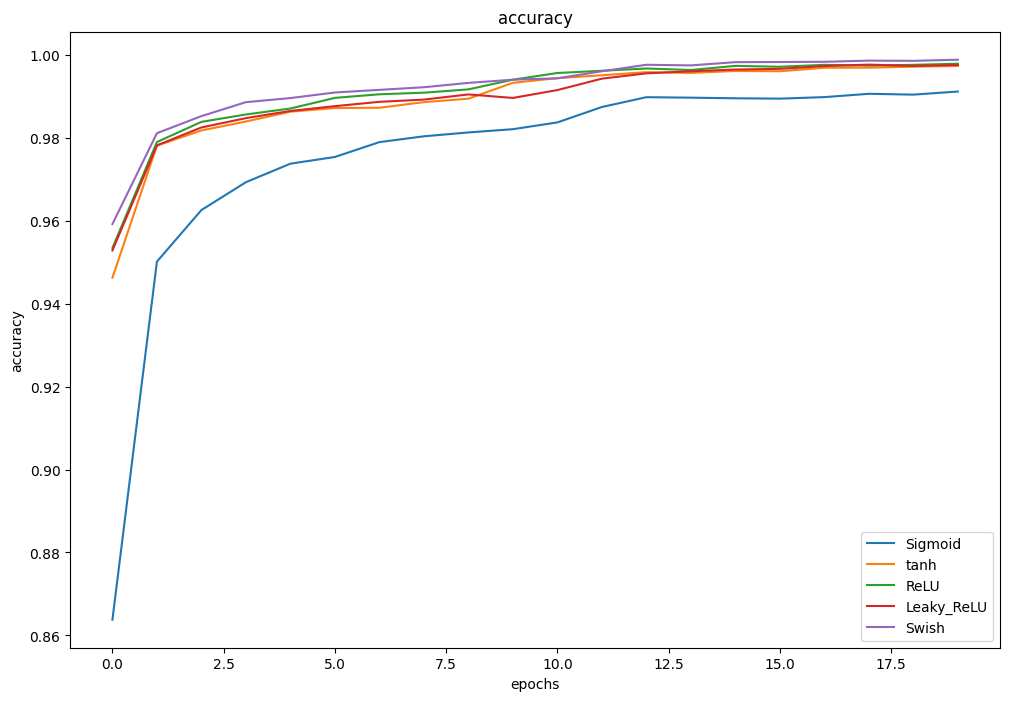

In [34]:
plot_history(hists, attribute="acc", axis=(-1,21,0.94,1.01), loc="lower right")

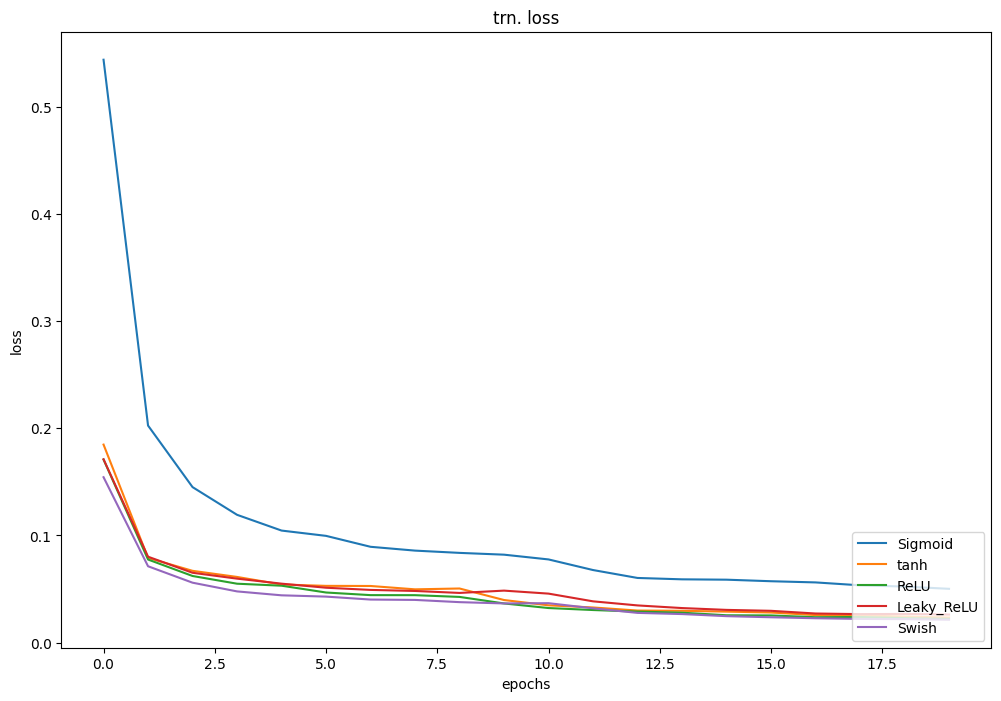

In [35]:
plot_history(hists, attribute="loss", axis=(-1,21,0.94,1.01), loc="lower right")

In [36]:
func_dict ={"Sigmoid":sigmoid_score,"Tanh":tanh_score, 
            "ReLU":relu_score,"LeakyRelu":LeakyRelu_score,"Swish":swish_score}
for i in func_dict:
    print(f"{i:10} -> Test Loss :{func_dict[i][0]:.4f} - Test accuraxy :{func_dict[i][1]:.4f}")

Sigmoid    -> Test Loss :0.0461 - Test accuraxy :0.9916
Tanh       -> Test Loss :0.0448 - Test accuraxy :0.9908
ReLU       -> Test Loss :0.0360 - Test accuraxy :0.9941
LeakyRelu  -> Test Loss :0.0440 - Test accuraxy :0.9921
Swish      -> Test Loss :0.0412 - Test accuraxy :0.9928
